## Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [13]:
df = pd.read_csv('Advertising.csv')

In [14]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Check for Missing Data

In [16]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Visualizing the Data

In [36]:
df["total_spend"]=df["TV"]+df["radio"]+df["newspaper"]

In [37]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


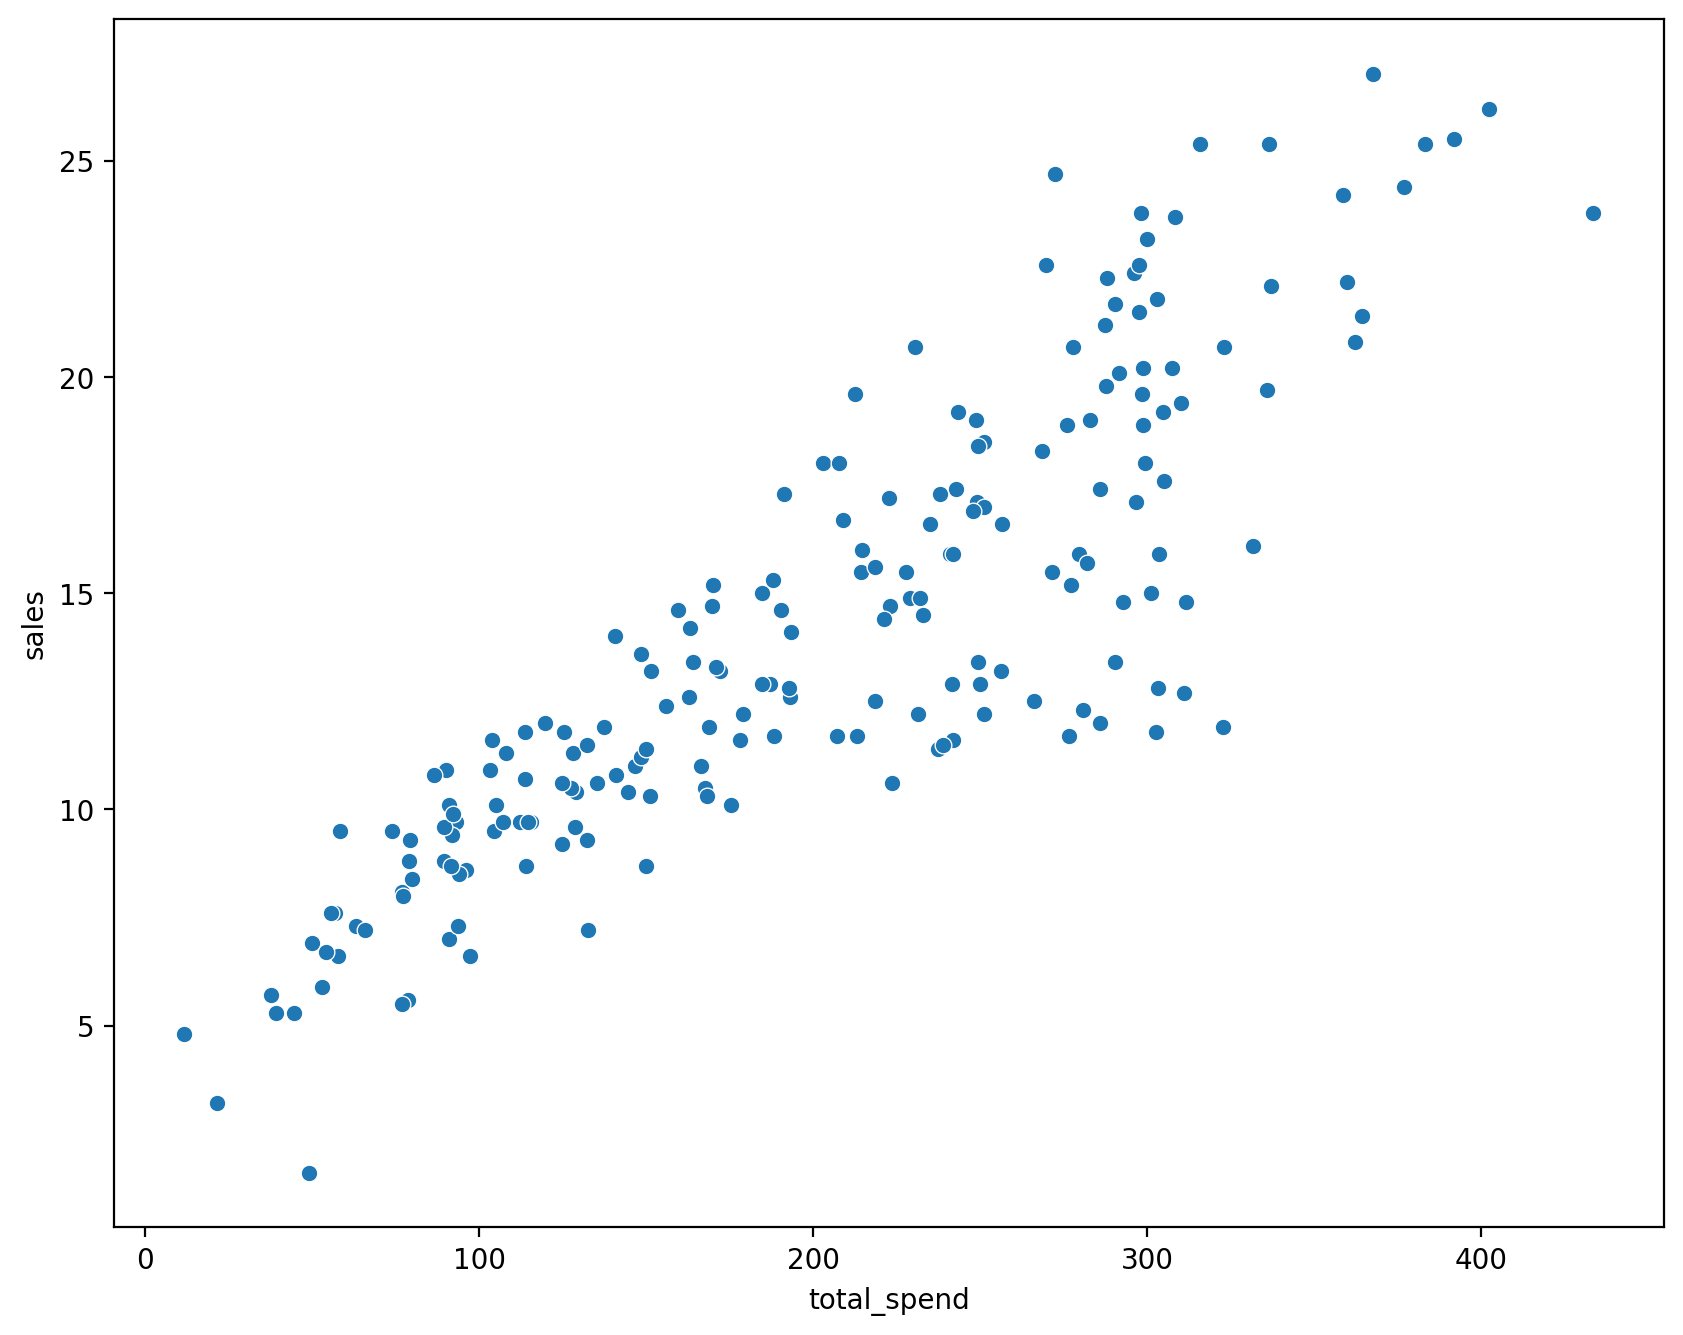

In [48]:
fig=plt.figure(figsize=(10,8), dpi=200)
sns.scatterplot(data=df, x="total_spend", y="sales");

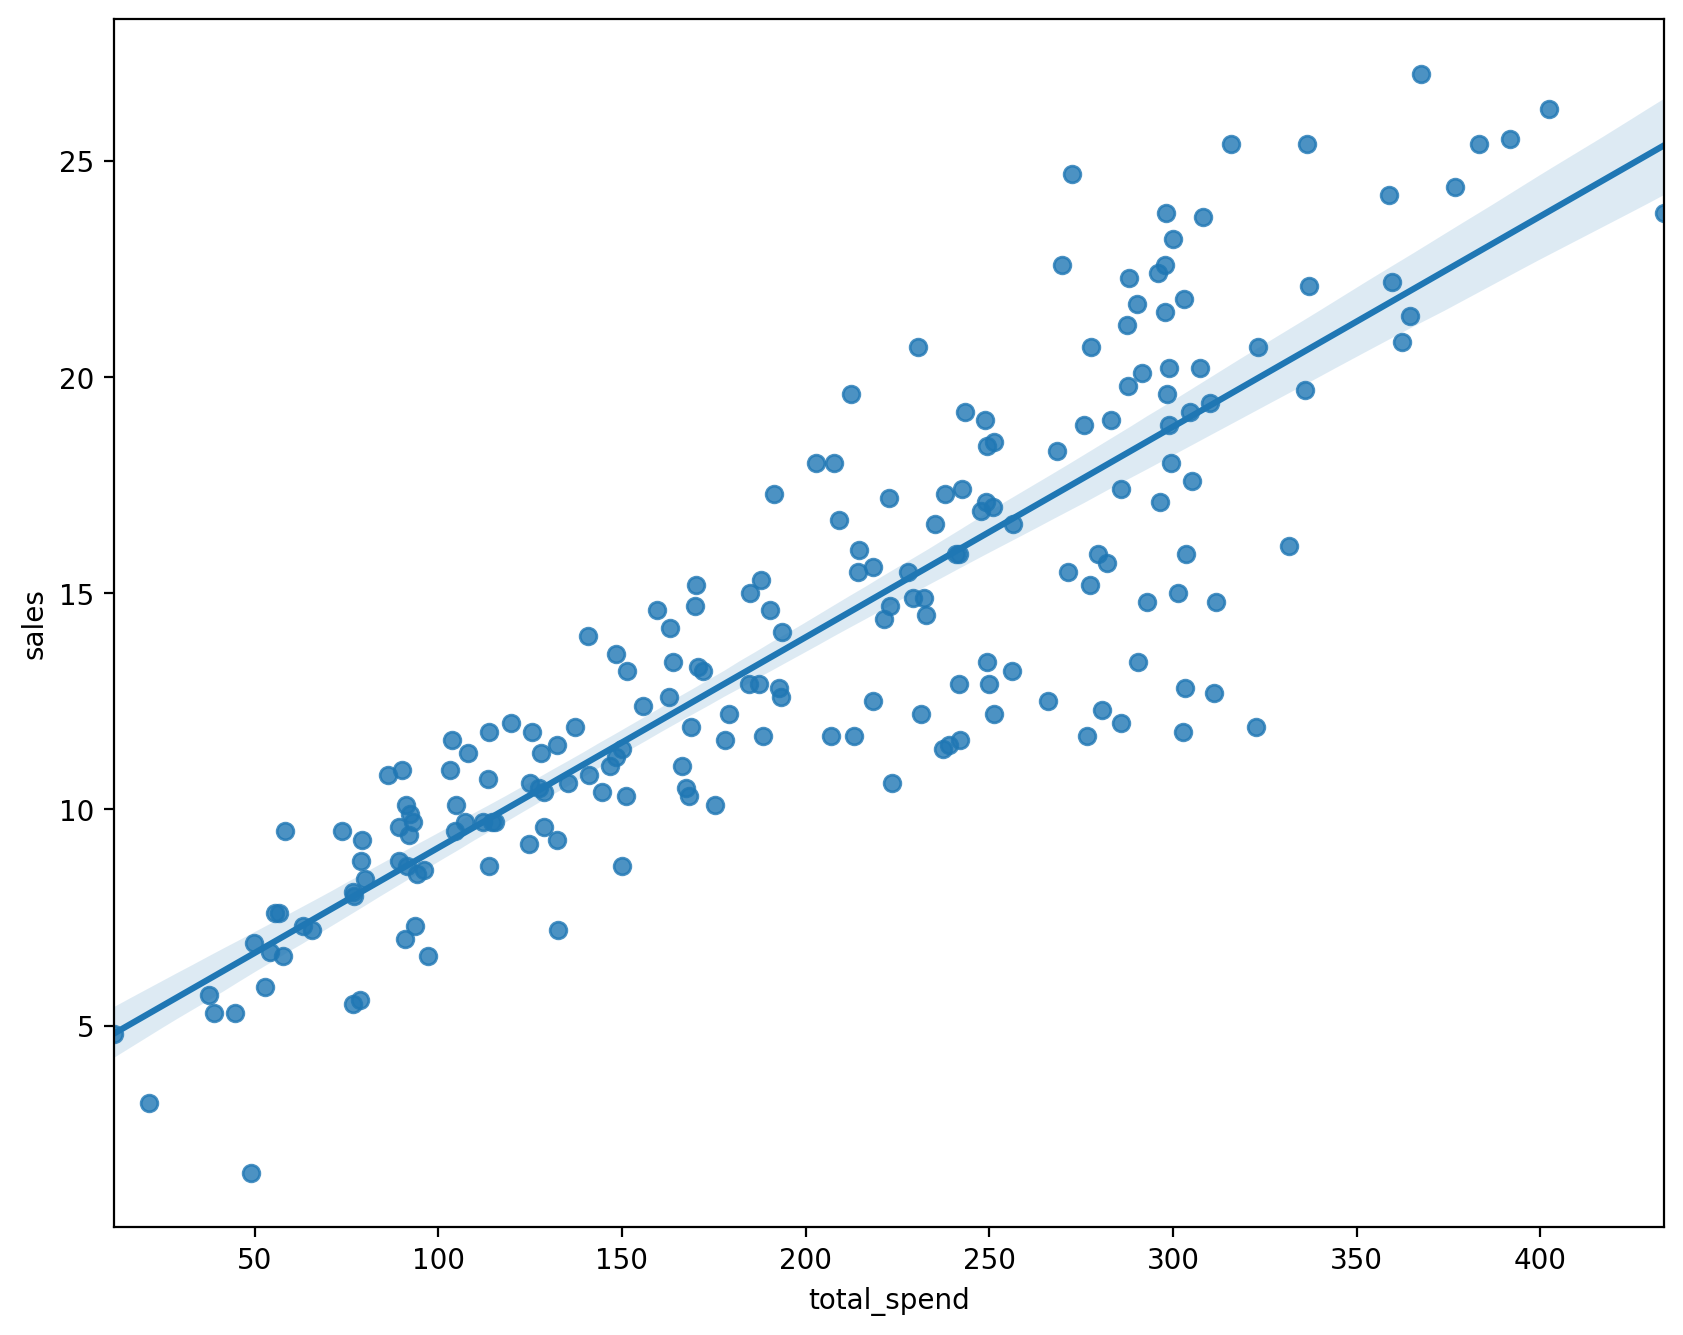

In [60]:
fig=plt.figure(figsize=(10,8), dpi=200)
sns.regplot(data=df, x="total_spend", y="sales");

## Data Preparation

In [65]:
X= df.drop(["sales","total_spend"], axis=1)

In [67]:
y= df["sales"]

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [76]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

## Model Training

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
model= RandomForestRegressor(n_estimators=30, random_state= 101)

In [105]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=101)

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
validation_predictions= model.predict(X_validation)

In [108]:
mean_absolute_error(y_validation, validation_predictions)

0.6575555555555552

In [115]:
mean_squared_error(y_validation, validation_predictions)**0.5   #RMSE

0.8542009478215644

## Final Performance Metrics(Holdout Set)

In [110]:
holdout_predictions= model.predict(X_holdout_test)

In [113]:
mean_absolute_error(y_holdout_test, holdout_predictions)

0.5937777777777775

In [116]:
mean_absolute_error(y_holdout_test, holdout_predictions)**0.5    #RMSE

0.7705697747626606

## Full Training

In [117]:
final_model= RandomForestRegressor(n_estimators=30, random_state=101)

In [118]:
final_model.fit(X, y)

RandomForestRegressor(n_estimators=30, random_state=101)

## Saving Model (and anything else as pickle file)

In [119]:
import joblib

In [120]:
joblib.dump(final_model,"final_model.pkl")

['final_model.pkl']

In [121]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

## Loading Model (Model Persistence)

In [122]:
col_names = joblib.load('column_names.pkl')

In [123]:
col_names

['TV', 'radio', 'newspaper']

In [124]:
loaded_model = joblib.load('final_model.pkl')

In [126]:
loaded_model.predict([[230,37,69]])

array([21.83666667])